In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# OPÇÃO 1: Métricas de Latência de API
def create_api_latency_data(days=30, freq_minutes=5):
    """
    Simula latência de API com padrões de tráfego e spikes ocasionais
    Características: spikes raros mas intensos, padrões horários
    """
    np.random.seed(123)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    # Base: latência baixa normal (50-150ms)
    baseline = np.random.normal(100, 15, n_points)
    
    # Padrão horário: maior latência durante picos de uso
    hourly_pattern = np.array([
        30 * np.sin((ts.hour - 2) * np.pi / 12) if 8 <= ts.hour <= 22 else -20
        for ts in timestamps
    ])
    
    # Spikes de latência (simulando sobrecarga)
    spikes = np.zeros(n_points)
    spike_indices = np.random.choice(n_points, size=int(n_points * 0.015), replace=False)
    for idx in spike_indices:
        spikes[idx] = np.random.exponential(300)
    
    # Degradação gradual (simulando memory leaks)
    degradation = np.linspace(0, 25, n_points)
    
    values = baseline + hourly_pattern + spikes + degradation
    values = np.maximum(values, 10)  # Latência mínima de 10ms
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: API Latência")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f} ms")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f} ms")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.7, linewidth=1, color='steelblue')
    plt.title('API Latência - Dados Simulados', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('Latência (ms)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# OPÇÃO 2: CPU Utilization
def create_cpu_utilization_data(days=30, freq_minutes=5):
    """
    Simula utilização de CPU com padrões de trabalho e batch jobs
    Características: padrões bem definidos, sazonalidade clara
    """
    np.random.seed(456)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    # CPU base (idle)
    base_cpu = np.random.normal(15, 5, n_points)
    
    # Padrão diário de trabalho
    work_pattern = np.array([
        40 * (1 + 0.5 * np.sin((ts.hour - 9) * np.pi / 8)) if 7 <= ts.hour <= 19 else 5
        for ts in timestamps
    ])
    
    # Batch jobs noturnos
    batch_jobs = np.array([
        np.random.exponential(25) if 1 <= ts.hour <= 4 and np.random.random() < 0.1 else 0
        for ts in timestamps
    ])
    
    # Weekend pattern (menos intenso)
    weekend_factor = np.array([
        0.3 if ts.dayofweek >= 5 else 1.0 for ts in timestamps
    ])
    
    values = base_cpu + (work_pattern * weekend_factor) + batch_jobs
    values = np.clip(values, 0, 100)  # CPU entre 0-100%
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: CPU Utilização")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f}%")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f}%")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.7, linewidth=1, color='orange')
    plt.title('CPU Utilização - Dados Simulados', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('CPU Usage (%)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# OPÇÃO 3: Memory Usage
def create_memory_usage_data(days=30, freq_minutes=5):
    """
    Simula uso de memória com garbage collection e memory leaks
    Características: crescimento gradual com quedas bruscas
    """
    np.random.seed(789)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    values = np.zeros(n_points)
    current_memory = 2048  # Start com 2GB
    
    for i, ts in enumerate(timestamps):
        # Crescimento gradual (simula memory leak)
        growth = np.random.normal(0.5, 0.2)
        current_memory += growth
        
        # Garbage Collection (drops súbitos)
        if np.random.random() < 0.008:  # ~0.8% chance de GC
            gc_reduction = np.random.uniform(0.15, 0.4)  # Reduz 15-40%
            current_memory *= (1 - gc_reduction)
        
        # Padrão semanal
        if ts.dayofweek < 5:  # Weekdays
            load_factor = np.random.uniform(1.0, 1.3)
        else:  # Weekends
            load_factor = np.random.uniform(0.7, 1.0)
        
        values[i] = current_memory * load_factor
        
        # Evitar valores muito baixos ou altos
        current_memory = np.clip(current_memory, 1000, 8000)
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: Memory Usage")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f} MB")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f} MB")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.7, linewidth=1, color='green')
    plt.title('Memory Usage - Dados Simulados', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('Memory Usage (MB)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# OPÇÃO 4: Network Traffic
def create_network_traffic_data(days=30, freq_minutes=5):
    """
    Simula tráfego de rede com padrões de negócio e DDoS ocasionais
    Características: distribuição assimétrica, eventos extremos
    """
    np.random.seed(999)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    # Tráfego base
    base_traffic = np.random.lognormal(4, 0.3, n_points)  # Log-normal para assimetria
    
    # Padrão horário (mais tráfego durante o dia)
    hourly_multiplier = np.array([
        (2 + np.sin((ts.hour - 12) * np.pi / 12)) if 6 <= ts.hour <= 23 else 0.5
        for ts in timestamps
    ])
    
    # Ataques DDoS simulados
    ddos_events = np.zeros(n_points)
    ddos_indices = np.random.choice(n_points, size=int(n_points * 0.005), replace=False)
    for idx in ddos_indices:
        # Simula DDoS por algumas horas
        duration = np.random.randint(6, 24)  # 30min a 2h (em períodos de 5min)
        end_idx = min(idx + duration, n_points)
        multiplier = np.random.uniform(5, 15)
        ddos_events[idx:end_idx] = multiplier
    
    values = base_traffic * hourly_multiplier * (1 + ddos_events)
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: Network Traffic")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f} Mbps")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f} Mbps")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.7, linewidth=1, color='purple')
    plt.title('Network Traffic - Dados Simulados', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('Network Traffic (Mbps)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# OPÇÃO 5: Database Response Time
def create_db_response_time_data(days=30, freq_minutes=5):
    """
    Simula tempo de resposta do banco com queries lentas e locks
    Características: eventos raros de alta latência, degradação gradual
    """
    np.random.seed(111)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    # Tempo base (queries normais)
    base_time = np.random.gamma(2, 10, n_points)  # Gamma para distribuição assimétrica
    
    # Degradação por fragmentação
    fragmentation = np.linspace(0, 50, n_points) * (np.random.random(n_points) < 0.3)
    
    # Queries lentas/locks
    slow_queries = np.zeros(n_points)
    slow_indices = np.random.choice(n_points, size=int(n_points * 0.02), replace=False)
    for idx in slow_indices:
        slow_queries[idx] = np.random.exponential(500)
    
    # Padrão de backup (degrada performance)
    backup_pattern = np.array([
        200 if ts.hour == 2 and np.random.random() < 0.8 else 0  # Backup às 2h
        for ts in timestamps
    ])
    
    values = base_time + fragmentation + slow_queries + backup_pattern
    values = np.maximum(values, 1)  # Mínimo 1ms
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: Database Response Time")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f} ms")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f} ms")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.7, linewidth=1, color='red')
    plt.title('Database Response Time - Dados Simulados', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('Response Time (ms)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# OPÇÃO 6: Sistema Estável (Poucas Anomalias)
def create_stable_system_data(days=30, freq_minutes=5):
    """
    Simula um sistema estável com poucos picos e comportamento previsível
    Características: baixa variabilidade, padrões suaves, poucas anomalias
    """
    np.random.seed(222)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    # Base estável com pouca variação
    baseline = np.random.normal(75, 3, n_points)  # Variação muito baixa
    
    # Padrão sazonal suave (diário)
    daily_cycle = np.array([
        10 * np.sin((ts.hour - 6) * np.pi / 12) for ts in timestamps
    ])
    
    # Padrão semanal suave
    weekly_cycle = np.array([
        5 * np.sin((ts.dayofweek) * np.pi / 3.5) for ts in timestamps
    ])
    
    # Poucas anomalias muito sutis
    minor_anomalies = np.zeros(n_points)
    anomaly_indices = np.random.choice(n_points, size=int(n_points * 0.003), replace=False)  # Só 0.3%
    for idx in anomaly_indices:
        minor_anomalies[idx] = np.random.normal(0, 8)  # Anomalias pequenas
    
    # Ruído muito baixo
    noise = np.random.normal(0, 2, n_points)
    
    values = baseline + daily_cycle + weekly_cycle + minor_anomalies + noise
    values = np.maximum(values, 40)  # Valor mínimo
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: Sistema Estável (Poucas Anomalias)")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f}")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f}")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    print(f" • Coef. Variação: {df['y'].std()/df['y'].mean():.3f} (baixo = estável)")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.8, linewidth=1, color='darkgreen')
    plt.title('Sistema Estável - Dados Simulados (Baixa Variabilidade)', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('Métrica do Sistema')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# OPÇÃO 7: Crescimento com Tendência
def create_growth_trend_data(days=30, freq_minutes=5):
    """
    Simula uma métrica com forte tendência de crescimento
    Características: tendência clara, sazonalidade, crescimento sustentado
    """
    np.random.seed(333)
    
    end_time = datetime.now()
    start_time = end_time - timedelta(days=days)
    timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{freq_minutes}min')
    n_points = len(timestamps)
    
    # Tendência de crescimento forte
    trend = np.linspace(100, 300, n_points)  # Cresce de 100 para 300
    
    # Crescimento acelerado (não-linear)
    acceleration = np.array([0.5 * (i/n_points)**1.5 * 50 for i in range(n_points)])
    
    # Sazonalidade diária
    daily_pattern = np.array([
        15 * np.sin((ts.hour - 3) * np.pi / 12) for ts in timestamps
    ])
    
    # Sazonalidade semanal
    weekly_pattern = np.array([
        10 * np.cos((ts.dayofweek) * np.pi / 3.5) for ts in timestamps
    ])
    
    # Componente autoregressiva para suavizar
    values = np.zeros(n_points)
    values[0] = trend[0] + daily_pattern[0] + weekly_pattern[0]
    
    for i in range(1, n_points):
        momentum = 0.2 * values[i-1]  # Suavização
        current = trend[i] + acceleration[i] + daily_pattern[i] + weekly_pattern[i]
        noise = np.random.normal(0, 5)
        values[i] = 0.8 * current + momentum + noise
    
    # Alguns pequenos "degraus" de crescimento
    step_indices = np.random.choice(range(n_points//4, 3*n_points//4), size=3, replace=False)
    for idx in step_indices:
        step_size = np.random.uniform(10, 25)
        values[idx:] += step_size
    
    values = np.maximum(values, 50)  # Valor mínimo
    
    df = pd.DataFrame({'ds': timestamps, 'y': values})
    
    # Visualização e estatísticas
    print("📊 DATASET: Crescimento com Tendência")
    print(f" • Período: {df['ds'].min().strftime('%Y-%m-%d')} até {df['ds'].max().strftime('%Y-%m-%d')}")
    print(f" • Pontos: {len(df):,}")
    print(f" • Valor médio: {df['y'].mean():.2f}")
    print(f" • Min/Max: {df['y'].min():.2f} / {df['y'].max():.2f}")
    print(f" • Crescimento total: {((df['y'].iloc[-100:].mean() / df['y'].iloc[:100].mean()) - 1) * 100:.1f}%")
    print(f" • Desvio padrão: {df['y'].std():.2f}")
    
    plt.figure(figsize=(15, 6))
    plt.plot(df['ds'], df['y'], alpha=0.8, linewidth=1, color='darkblue')
    plt.title('Crescimento com Tendência - Dados Simulados', fontsize=14, weight='bold')
    plt.xlabel('Data')
    plt.ylabel('Métrica em Crescimento')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df

# INSTRUÇÕES DE USO:
print("🚀 GERADORES INDIVIDUAIS DISPONÍVEIS:")
print("1. df = create_api_latency_data(days=30)          # Spikes e anomalias")
print("2. df = create_cpu_utilization_data(days=30)      # Padrões sazonais")  
print("3. df = create_memory_usage_data(days=30)         # GC e crescimento")
print("4. df = create_network_traffic_data(days=30)      # Distribuição assimétrica")
print("5. df = create_db_response_time_data(days=30)     # Queries lentas")
print("6. df = create_stable_system_data(days=30)        # BAIXA VARIABILIDADE")
print("7. df = create_growth_trend_data(days=30)         # TENDÊNCIA FORTE")
print("\n✅ Cada função retorna um DataFrame pronto para o NeuralForecast!")

🚀 GERADORES INDIVIDUAIS DISPONÍVEIS:
1. df = create_api_latency_data(days=30)          # Spikes e anomalias
2. df = create_cpu_utilization_data(days=30)      # Padrões sazonais
3. df = create_memory_usage_data(days=30)         # GC e crescimento
4. df = create_network_traffic_data(days=30)      # Distribuição assimétrica
5. df = create_db_response_time_data(days=30)     # Queries lentas
6. df = create_stable_system_data(days=30)        # BAIXA VARIABILIDADE
7. df = create_growth_trend_data(days=30)         # TENDÊNCIA FORTE

✅ Cada função retorna um DataFrame pronto para o NeuralForecast!


📊 DATASET: Crescimento com Tendência
 • Período: 2025-05-26 até 2025-08-24
 • Pontos: 25,921
 • Valor médio: 236.25
 • Min/Max: 72.70 / 408.34
 • Crescimento total: 217.6%
 • Desvio padrão: 84.48


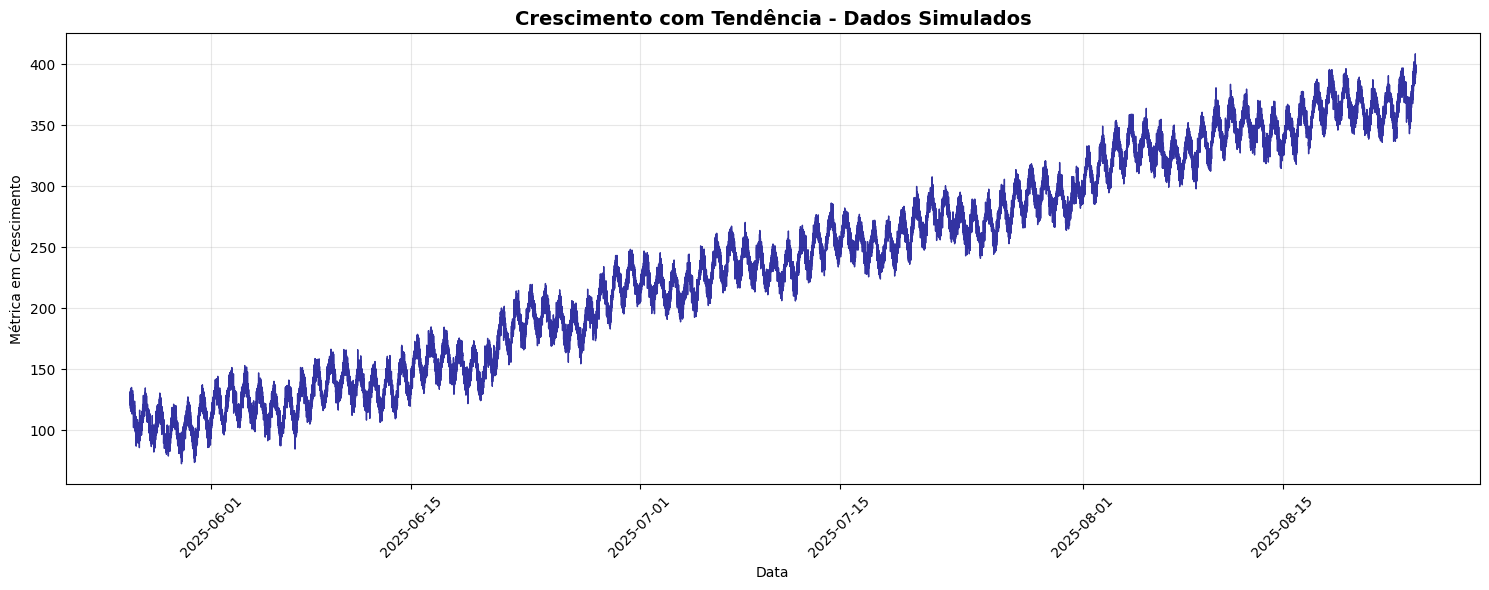

In [10]:
# Teste um por vez:
#df = create_api_latency_data(days=90)        # Latência com spikes
#df = create_cpu_utilization_data(days=90)    # CPU com padrões sazonais
#df = create_memory_usage_data(days=90)       # Memória com GC
#df = create_network_traffic_data(days=30)    # Tráfego assimétrico
#df = create_db_response_time_data(days=30)   # DB com queries lentas

# Comece pelo mais fácil:
#df = create_stable_system_data(days=90)

# Depois teste tendência:
df = create_growth_trend_data(days=90)

In [12]:
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df = df.set_index('ds')



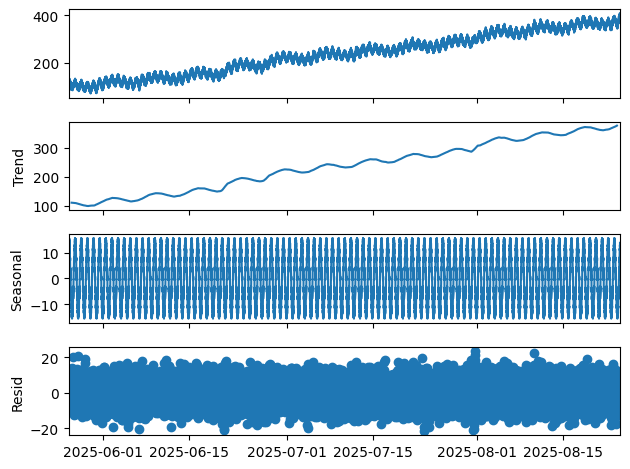

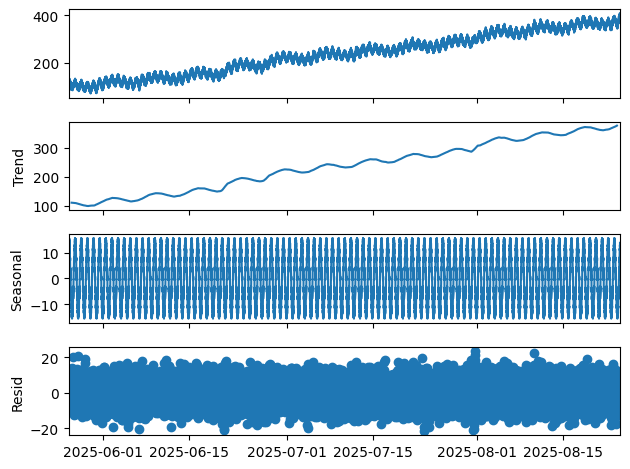

In [15]:
decompose = seasonal_decompose(df, period=288)
decompose.plot()